# PyTorch hardware benchmark analysis

Single node throughput comparisons between different hardware options at NERSC.

In [1]:
import os
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 14})

## Load the results

In [4]:
def parse_log(log_file):
    train_pattern = re.compile('.*Train samples (\S+) time (\S+) s rate (\S+).*')
    valid_pattern = re.compile('.*Valid samples (\S+) time (\S+) s rate (\S+).*')
    results = {}
    with open(log_file) as f:
        for l in f:
            m = train_pattern.match(l)
            if m:
                results['train_samples'] = int(m.group(1))
                results['train_time'] = float(m.group(2))
                results['train_rate'] = float(m.group(3))
            m = valid_pattern.match(l)
            if m:
                results['valid_samples'] = int(m.group(1))
                results['valid_time'] = float(m.group(2))
                results['valid_rate'] = float(m.group(3))
    return results

def load_results(base_dir, versions=None):
    """Load all results from a base_dir in paths base_dir/version/model"""
    if versions is None:
        versions = os.listdir(base_dir)
    results = []
    for version in versions:
        models = os.listdir(os.path.join(base_dir, version))
        for model in models:
            log_file = os.path.join(base_dir, version, model, 'out.log')
            result = parse_log(log_file)
            result.update(version=version, model=model)
            results.append(result)
    return pd.DataFrame(results)

In [5]:
results = []

In [6]:
# Load Cori Haswell results
base_dir = os.path.expandvars('$SCRATCH/pytorch-benchmarks/cori-hsw')
versions = ['v1.0.0-intel']    
results.append(load_results(base_dir, versions).assign(hardware='cori-hsw'))

In [7]:
# Cori KNL results
base_dir = os.path.expandvars('$SCRATCH/pytorch-benchmarks/cori-knl')
versions = ['v1.0.0-intel']
results.append(load_results(base_dir, versions).assign(hardware='cori-knl'))

In [8]:
# Load Cori GPU results
base_dir = '/project/projectdirs/nstaff/sfarrell/pytorch-benchmarks'
versions = ['v1.0.0-gpu']#, 'v1.0.1-gpu']
results.append(load_results(base_dir, versions).assign(hardware='cori-gpu'))

In [9]:
# Load Maeve GPU results
base_dir = '/global/cscratch1/sd/sfarrell/pytorch-benchmarks/maeve'
versions = ['v1.0.0-gpu']
results.append(load_results(base_dir, versions).assign(hardware='maeve-gpu'))

In [10]:
results = pd.concat(results, ignore_index=True)

## Tables

In [11]:
# The full DataFrame of results
results

,model,train_rate,train_samples,train_time,valid_rate,valid_samples,valid_time,version,hardware
0,inceptionV3,7.71612,1024,132.70900,44.3836,1024,23.07160,v1.0.0-intel,cori-hsw
1,lstm,184.68600,1024,5.54454,1020.5300,1024,1.00340,v1.0.0-intel,cori-hsw
2,alexnet,97.26190,1024,10.52830,523.6330,1024,1.95557,v1.0.0-intel,cori-hsw
3,resnet50,7.98210,1024,128.28700,40.1338,1024,25.51460,v1.0.0-intel,cori-hsw
4,vgg11,11.61470,1024,88.16380,50.3135,1024,20.35240,v1.0.0-intel,cori-hsw
5,cnn3d,200.73100,1024,5.10137,640.5370,1024,1.59866,v1.0.0-intel,cori-hsw
6,inceptionV3,3.42652,1024,298.84500,12.6958,1024,80.65640,v1.0.0-intel,cori-knl
7,lstm,46.79450,1024,21.88290,265.2870,1024,3.85997,v1.0.0-intel,cori-knl
8,alexnet,34.56380,1024,29.62640,234.6480,1024,4.36399,v1.0.0-intel,cori-knl
9,resnet50,3.86501,1024,264.94100,21.4372,1024,47.76740,v1.0.0-intel,cori-knl


In [12]:
# Training rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.train_rate.values, index=g.hardware))

hardware,cori-hsw,cori-knl,cori-gpu,maeve-gpu
model,,,,
alexnet,97.26190,34.56380,1748.490,1181.900
cnn3d,200.73100,78.04510,1973.200,1841.250
inceptionV3,7.71612,3.42652,212.636,122.022
lstm,184.68600,46.79450,7197.790,6264.240
resnet50,7.98210,3.86501,318.362,172.870
vgg11,11.61470,5.28523,381.828,218.292


In [13]:
# Evaluation rate per hardware
results.groupby('model').apply(lambda g: pd.Series(data=g.valid_rate.values, index=g.hardware))

hardware,cori-hsw,cori-knl,cori-gpu,maeve-gpu
model,,,,
alexnet,523.6330,234.6480,2693.700,2100.080
cnn3d,640.5370,274.9180,6877.690,5751.100
inceptionV3,44.3836,12.6958,611.357,384.545
lstm,1020.5300,265.2870,13346.800,12252.800
resnet50,40.1338,21.4372,858.077,521.571
vgg11,50.3135,25.2458,1036.540,604.011


## Training throughput comparisons

In [14]:
models = ['alexnet', 'vgg11', 'inceptionV3', 'resnet50', 'cnn3d', 'lstm']
results_by_model = results.groupby('model')

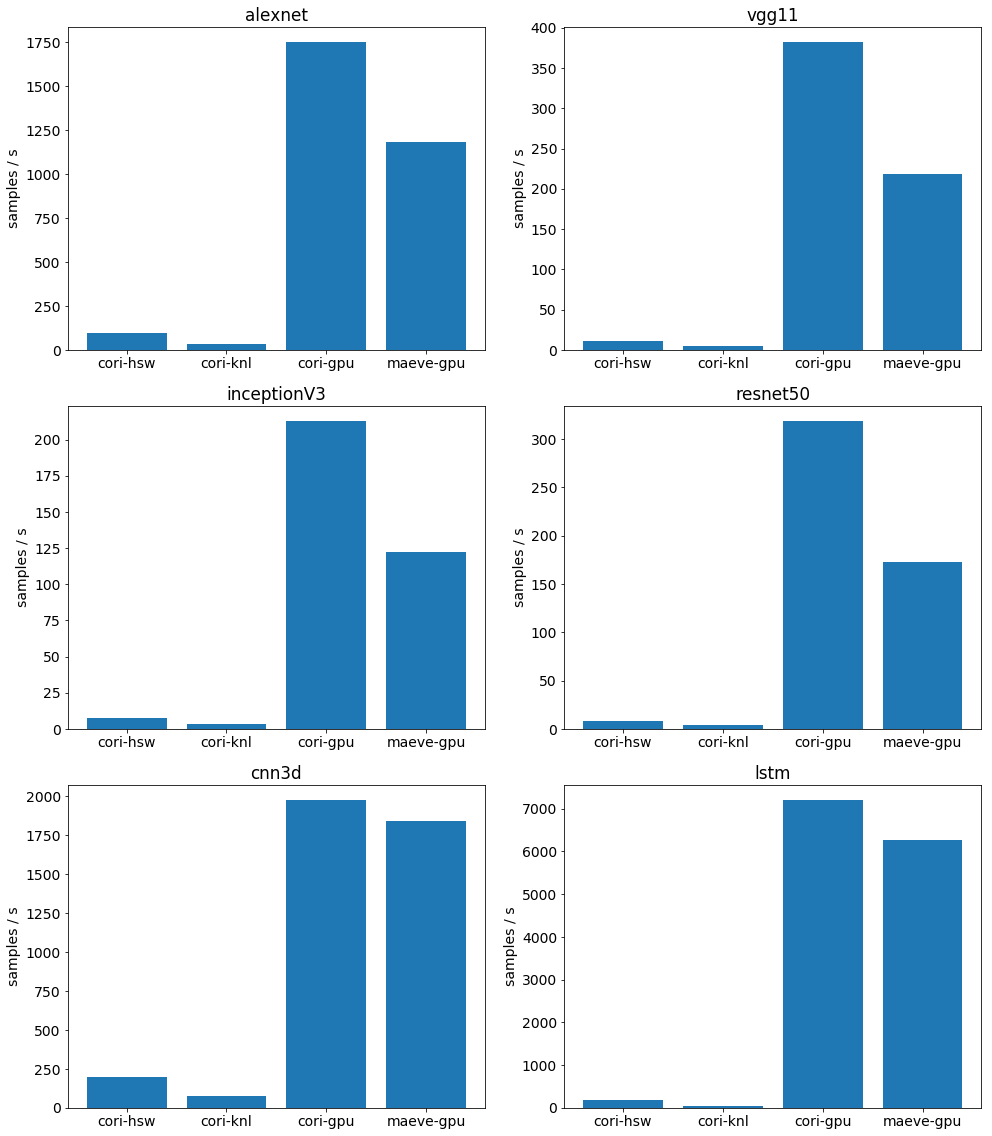

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 16))
axs = axs.flatten()

for i, model in enumerate(models):
    ax = axs[i]
    model_results = results_by_model.get_group(model)
    ax.bar(model_results.hardware, model_results.train_rate)
    ax.set_title(model)
    ax.set_ylabel('samples / s')

plt.tight_layout()